# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Arliyandi
- Email: arlialya@gmail.com
- Id Dicoding: itsMatcha

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset ini berisi 4424 data historis siswa dari Jaya Jaya Institut, mencakup informasi akademik, sosial, serta ekonomi siswa. Total ada 37 kolom, termasuk variabel target `Status` dengan tiga kelas: `Graduate`, `Dropout`, dan `Enrolled`.
Tujuan analisis adalah untyk mendeteksi siswa yang berisiko melakukan dropout


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Terdapat 37 kolom dengan total 4424 entri. Sebagian besar fitur bertipe numerik (`int64` dan `float64`), dan hanya kolom `Status` yang bertipe `object`. Juga tidak terdapat nilai kosong atau null

In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df['Status'].value_counts(normalize=True) * 100

Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

Distribusi kelas:
- Graduate: ~50%
- Dropout: ~32%
- Enrolled: ~18%

Karena fokus bisnis adalah mendeteksi dropout, maka `Dropout` akan dikonversi menjadi kelas positif (`1`), sementara `Graduate` dan `Enrolled` akan digabung menjadi kelas negatif (`0`) agar lebih efisien.

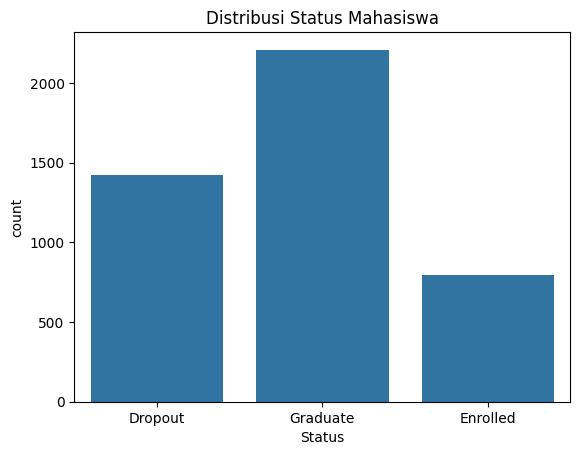

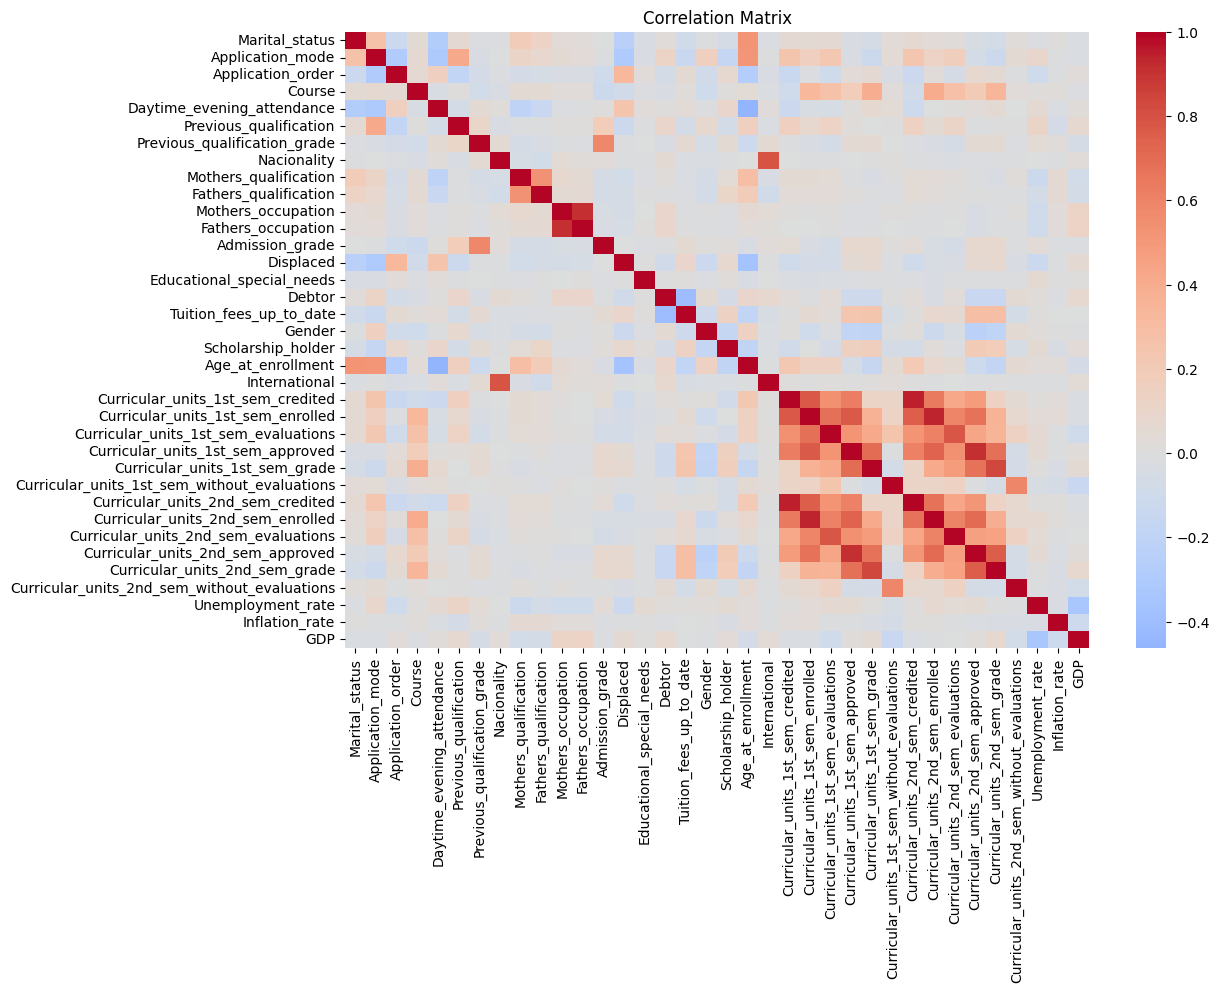

In [6]:
sns.countplot(data=df, x='Status')
plt.title("Distribusi Status Mahasiswa")
plt.show()

corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Tampak beberapa fitur akademik semester 1 dan semester 2 memiliki korelasi tinggi satu sama lain, misalnya:
- `Curricular_units_1st_sem_enrolled` berkorelasi dengan `1st_sem_approved` dan `1st_sem_grade`.
- Korelasi antar semester 1 dan semester 2 juga cukup kuat.

Namun, korelasi dengan target (`Status`) tidak ditampilkan karena masih berupa tipe `object` dan akan dikonversi pada tahap preprocessing nantinya

## Data Preparation / Preprocessing

In [7]:
df['target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
df.drop(columns=['Status'], inplace=True)

Label `target` dibuat dari kolom `Status`:
- 1 → Dropout (berisiko keluar)
- 0 → Graduate atau Enrolled (tetap aktif atau sudah lulus)

Kolom `Status` dihapus setelah transformasi karena sudah digantikan ke fitur `target`.

In [8]:
categorical_features = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
    'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
    'International'
]

# Sisanya fitur numerik
numerical_features = df.drop(columns=categorical_features + ['target']).columns.tolist()

Semua fitur kategorikal diubah menjadi angka dengan `OrdinalEncoder`, karena nantinya model XGBoost dapat menangani input numerik tanpa perlu OneHot.

In [9]:
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

In [10]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [11]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,target
0,0.0,7.0,5.0,1.0,1.0,0.0,-0.804841,0.0,12.0,9.0,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,1
1,0.0,5.0,1.0,10.0,1.0,0.0,2.076819,0.0,0.0,2.0,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0
2,0.0,0.0,5.0,4.0,1.0,0.0,-0.804841,0.0,21.0,26.0,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,1
3,0.0,7.0,2.0,14.0,1.0,0.0,-0.804841,0.0,22.0,26.0,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0
4,1.0,11.0,1.0,2.0,0.0,0.0,-2.473171,0.0,21.0,27.0,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0


In [12]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03,4424.000000,4424.000000,4424.000000,...,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4424.000000
mean,0.178571,5.886980,1.727396,8.899186,0.890823,1.531420,-3.589654e-16,0.254521,11.322107,15.455244,...,-3.212219e-18,1.646262e-16,-8.994212e-17,-1.509743e-16,-2.409164e-16,3.212219e-18,-5.460771e-17,1.445498e-16,2.569775e-17,0.321203
std,0.605747,5.298964,1.311632,4.331792,0.311897,3.963707,1.000113e+00,1.748447,9.026251,11.044800,...,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,0.466991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.852337e+00,0.000000,0.000000,0.000000,...,-2.824423e-01,-2.838337e+00,-2.042630e+00,-1.471527e+00,-1.963489e+00,-1.994410e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00,0.000000
25%,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,-5.773417e-01,0.000000,1.000000,2.000000,...,-2.824423e-01,-5.611611e-01,-5.226824e-01,-8.080500e-01,9.976438e-02,-1.994410e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01,0.000000
50%,0.000000,7.000000,1.000000,9.000000,1.000000,0.000000,3.690696e-02,0.000000,12.000000,13.000000,...,-2.824423e-01,-1.057260e-01,-1.603320e-02,1.871653e-01,3.780636e-01,-1.994410e-01,-1.750068e-01,1.243865e-01,1.401217e-01,0.000000
75%,0.000000,11.000000,2.000000,12.000000,1.000000,0.000000,5.601559e-01,0.000000,21.000000,26.000000,...,-2.824423e-01,3.497091e-01,4.906160e-01,5.189037e-01,5.955849e-01,-1.994410e-01,8.762221e-01,9.923451e-01,7.877904e-01,1.000000
max,5.000000,17.000000,7.000000,16.000000,1.000000,16.000000,4.351815e+00,20.000000,28.000000,33.000000,...,9.622009e+00,7.636671e+00,6.317081e+00,5.163242e+00,1.600935e+00,1.572225e+01,1.739731e+00,1.787974e+00,1.545607e+00,1.000000


In [13]:
X = df.drop(columns=['target'])
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [15]:
print("Distribusi bfr SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi after SMOTE:", Counter(y_train_resampled))

Distribusi bfr SMOTE: Counter({0: 2402, 1: 1137})
Distribusi after SMOTE: Counter({1: 2402, 0: 2402})


Sebelum SMOTE:
- Non-dropout: 2402
- Dropout: 1137

Setelah SMOTE:
- Dropout dan Non-dropout masing-masing menjadi 2402

SMOTE digunakan untuk membuat jumlah kelas menjadi seimbang, membantu model mengenali kelas minoritas (Dropout) dengan lebih baik

## Modeling

In [16]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

c:\Users\Vrooh\anaconda3\envs\submission-pds2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:20:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Evaluation

In [17]:
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb, target_names=["Not Dropout", "Dropout"]))

Classification Report (XGBoost):

              precision    recall  f1-score   support

 Not Dropout       0.89      0.93      0.91       601
     Dropout       0.84      0.77      0.80       284

    accuracy                           0.88       885
   macro avg       0.86      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885



Dengan recall 77% dan F1-Score 80%, sistem ini cocok untuk digunakan sebagai peringatan dini untuk siswa yang berisiko keluar.

In [18]:
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix (XGBoost):
[[558  43]
 [ 66 218]]


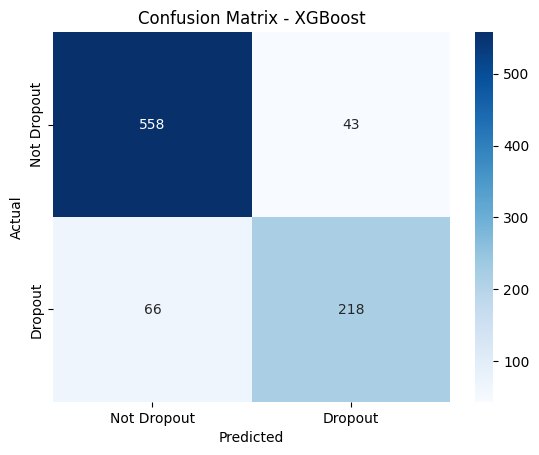

In [19]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

AUC Score (XGBoost): 0.9295


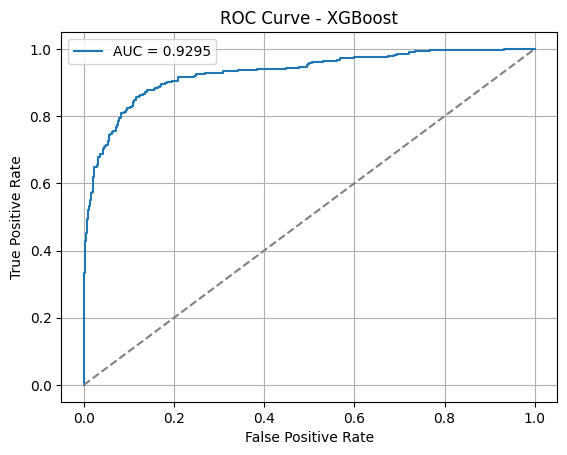

In [20]:
y_proba = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score (XGBoost): {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

### Interpretasi

- Model mampu mengenali siswa dropout secara efektif.
- Dengan recall 77% dan F1-Score 80%, sistem ini cocok untuk digunakan sebagai peringatan dini untuk siswa yang berisiko keluar.
- AUC > 0.9 menunjukkan performa klasifikasi yang sangat baik secara keseluruhan.

In [21]:
joblib.dump(xgb, "model/xgb_model.pkl")

['model/xgb_model.pkl']